<a href="https://colab.research.google.com/github/muhammadwajeeharif/Classifying_movie_reviews_a_binary_classification_example/blob/main/Classifying_movie_reviews_a_binary_classification_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
len(train_data[0])

218

In [ ]:
train_labels[0]


1

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [ ]:
#Encoding the integer sequences into a binary matrix
#we used tocategorial as well.
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
#we dont encode labels
#only change data types
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #hamne sigmoid isliye use kia taky hame probability maloom hojaye .5 se bari to positive wrna negative


In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Configuring the optimizer
#is tarah compile likh skty hy learningrate laga kr 
#from keras import optimizers
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
#Using custom losses and metrics
#is tarah bhi likh skty hy
#from keras import losses
#from keras import metrics
#model.compile(optimizer=optimizers.RMSprop(lr=0.001),loss=losses.binary_crossentropy,metrics=[metrics.binary_accuracy])

In [ ]:
#Validating your approach
#Setting aside a validation set
#validation me ham traing me se kuch data nikalty aur sath hi test bhi krwate rehty hy,agr training me 95% accuracy arahihy aur test me 80% to 15% overfitting hogayi to hamara test ka data expose hgya hy ab relaibilty ka issue eagya hamara tetst data expose hogya isi waja se ham validation set bnate hy jo ky traing data se lege ab traing ke sath thora thora data validation ka bhi dete jaygy yani usko test bhi krty jayge
x_val = x_train[:10000] #x_train mese shuru ka 10000 ka data nikal lia aur usse x_val me rakhdia
partial_x_train = x_train[10000:] #xtrain ka baki data partialxtrain merakhdia
#isi tarah labels ke sath kia
y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [ ]:
#Training your model
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 2s 49ms/step - loss: 0.6056 - accuracy: 0.7187 - val_loss: 0.4064 - val_accuracy: 0.8563
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3376 - accuracy: 0.8961 - val_loss: 0.3163 - val_accuracy: 0.8786
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2359 - accuracy: 0.9262 - val_loss: 0.2997 - val_accuracy: 0.8794
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1841 - accuracy: 0.9391 - val_loss: 0.2773 - val_accuracy: 0.8892
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1473 - accuracy: 0.9538 - val_loss: 0.3346 - val_accuracy: 0.8684
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1206 - accuracy: 0.9613 - val_loss: 0.2934 - val_accuracy: 0.8852
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0970 - accuracy: 0.9699 - val_loss: 0.3373 - val_accuracy: 0.8734
Epoch 8/20
30

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

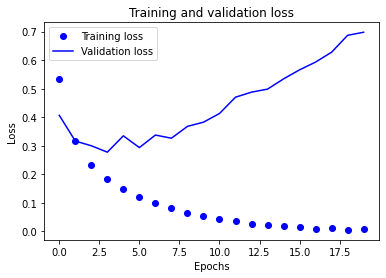

In [ ]:
#Plotting the training and validation loss
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(20)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [26]:
# is pta chala ky epoch ky baat val_accuracy girne lagayi to hamne validate seye pta lagalia ab agr hamara desire accuracy achi hy to ham 4 a epoch pr dobara train krlege validation hata kr

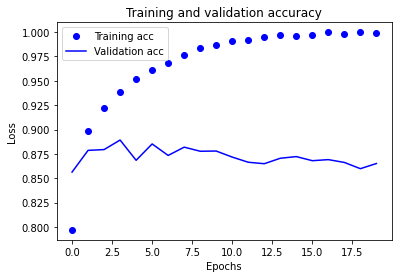

In [ ]:
#Plotting the training and validation accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model1 = models.Sequential()
model1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model1.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model1.fit(x_train,y_train,epochs=4,batch_size=512)
results=model1.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.5433 - accuracy: 0.7353
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2595 - accuracy: 0.9134
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1961 - accuracy: 0.9334
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3167 - accuracy: 0.8757
